In [29]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Load Excel File
data = pd.read_excel('../data/final_dataset_1.xlsx')

# Set regression target
target = "TimeSpentOnPage"

# Drop target + ID
X = data.drop(columns=[target, "CustomerID"])
y = data[target]

# Split numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# ---------- MUTUAL INFORMATION ----------
mi = mutual_info_regression(X_encoded, y)
mi_series = pd.Series(mi, index=X_encoded.columns)

# ---------- PEARSON CORRELATION ----------
# correlation only works with numeric features, so we use encoded X
corr_series = X_encoded.corrwith(y)

# ---------- COMBINE INTO ONE TABLE ----------
result_table = pd.DataFrame({
    "MutualInfo": mi_series,
    "Correlation": corr_series
})

# sort by MI (or correlation if you prefer)
result_table = result_table.sort_values(by="MutualInfo", ascending=False)

print(result_table)


                                  MutualInfo  Correlation
AnnualIncome                        0.015588     0.003013
daily_coffee_cups                   0.010708    -0.007871
Customer_lifetime_Value             0.010499     0.006989
subscription_type_Intermediate      0.009552     0.004724
ReferralSource_Paid Ads             0.008795    -0.004137
Conversions                         0.008238     0.004912
product_category_Electronics        0.007986    -0.006775
AdViewFrequency                     0.007456    -0.008116
ActualLeadQuality_Low               0.006709     0.006547
subscription_type_Premium           0.006175    -0.015733
WebsiteVisits                       0.006118    -0.009027
ScrollRate                          0.005967     0.019368
MarketingChannel_Email Marketing    0.004933     0.014954
DeviceType_Mobile                   0.004893    -0.015360
SeasonalityFactor_Spring            0.004296    -0.011691
CustomerLoyaltyStatus_New           0.003926    -0.007902
CustomerAgeGro

In [27]:
# Simple Logistic Regression implementation

from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Load Excel File
data = pd.read_excel('../data/final_dataset_1.xlsx')

print(data.head())

# Calculate Mutual Information
target = "Churn_risk"

X = data.drop(target, axis=1)
# drop CustomerID
X = X.drop("CustomerID", axis=1)

# Split numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

y = data[target]
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_series)


  CustomerID  Age  AnnualIncome  WebsiteVisits  Clicks  Conversions  \
0  CUST00001   49         11283             16      19            6   
1  CUST00002   57         12968             10      30            1   
2  CUST00003   44         11170             15      17            7   
3  CUST00004   58         12947             14      30            1   
4  CUST00005   35         12202             11      16            6   

   Impressions MarketingChannel  BounceRate  ScrollRate  ...  CSAT  has_pet  \
0           23  Email Marketing    0.256160    0.384589  ...     4        1   
1           31  Email Marketing    0.262553    0.314044  ...     3        0   
2           25      Display Ads    0.098418    0.997437  ...     4        0   
3           26  Email Marketing    0.434616    0.448675  ...     4        0   
4           31     Social Media    0.524063    0.860908  ...     2        0   

   Sun_Sign daily_coffee_cups product_category  subscription_type  \
0    Taurus                 3

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

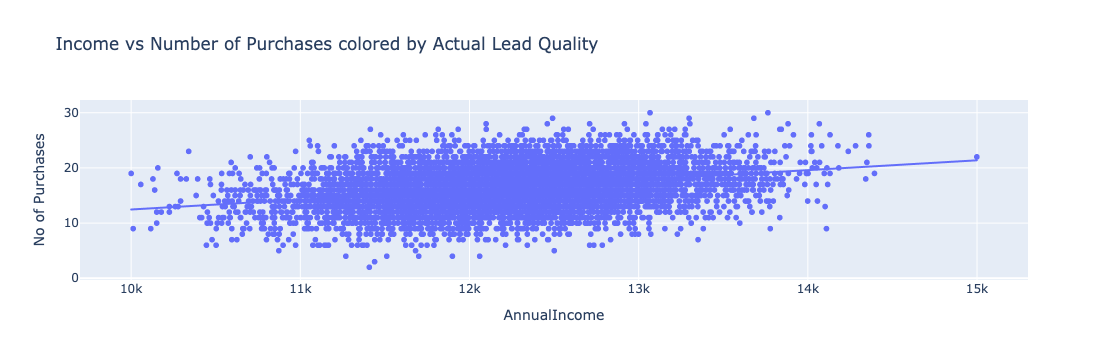

In [15]:
import plotly.express as px
fig = px.scatter(data, x='AnnualIncome', y='No of Purchases',
                 title='Income vs Number of Purchases colored by Actual Lead Quality', trendline='ols')
fig.show()

In [16]:
# Run Regression Model to confirm dependency between AnnualIncome and No of Purchases
import statsmodels.api as sm
X_reg = sm.add_constant(data['AnnualIncome'])
y_reg = data['No of Purchases']
model = sm.OLS(y_reg, X_reg).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        No of Purchases   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     740.2
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          4.95e-155
Time:                        15:47:45   Log-Likelihood:                -19037.
No. Observations:                7000   AIC:                         3.808e+04
Df Residuals:                    6998   BIC:                         3.809e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.3628      0.803     -6.681   

/var/folders/76/fw3vf7lx5jx_p5d21p8rzd280000gn/T/ipykernel_52283/1765967672.py:23: RuntimeWarning:

invalid value encountered in sqrt



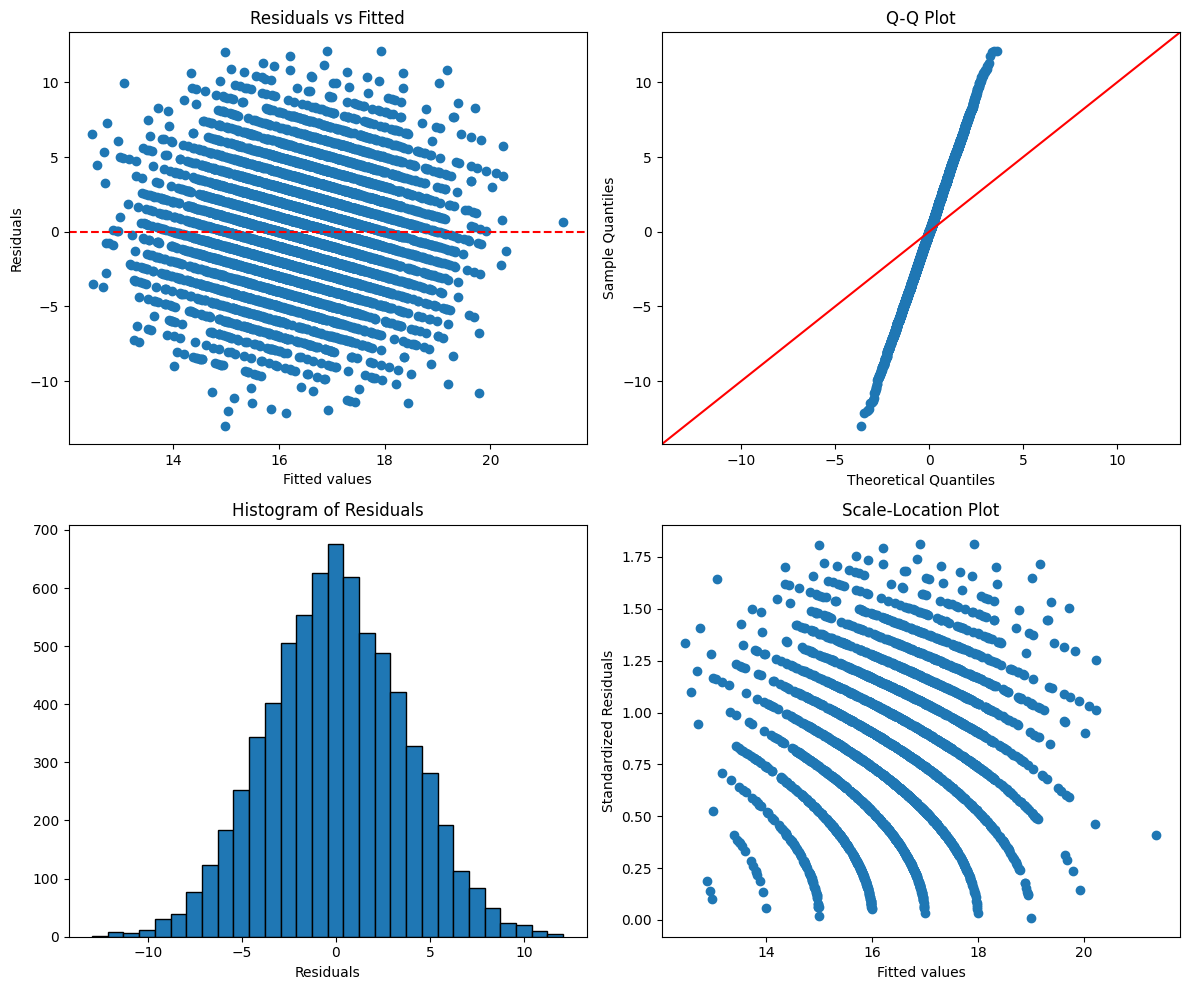

In [17]:
# Visualize the regression residuals
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
axes[0, 0].scatter(model.fittedvalues, model.resid)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# Histogram of residuals
axes[1, 0].hist(model.resid, bins=30, edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_title('Histogram of Residuals')

# Scale-Location plot
axes[1, 1].scatter(model.fittedvalues, (model.resid_pearson)**0.5)
axes[1, 1].set_xlabel('Fitted values')
axes[1, 1].set_ylabel('Standardized Residuals')
axes[1, 1].set_title('Scale-Location Plot')

plt.tight_layout()
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression

X_reg = data[['AnnualIncome']]
y_reg = data['No of Purchases']

lr = LinearRegression().fit(X_reg, y_reg)
y_pred = lr.predict(X_reg)
resid = y_reg - y_pred

print(f"Intercept: {lr.intercept_:.4f}")
print(f"Coefficient for AnnualIncome: {lr.coef_[0]:.4f}")
print(f"R-squared: {lr.score(X_reg, y_reg):.4f}")


Intercept: -5.3628
Coefficient for AnnualIncome: 0.0018
R-squared: 0.0957


In [24]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Zielvariable entfernen

# Mutual Information top 3
# LoyaltyPoints                       0.893691
# Age                                 0.772739
# CSAT                                0.475547

top3_features = mi_series.sort_values(ascending=False).head(3).index.tolist()
print(top3_features)

num_cols = data[top3_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data[top3_features].select_dtypes(include=['object', 'category']).columns.tolist()



num_cols = [c for c in num_cols if c != 'No of Purchases']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

model = Pipeline(steps=[
    ('prep', preprocess),
    ('reg', LinearRegression())
])

X = data[num_cols + cat_cols]
y = data['No of Purchases']

model.fit(X, y)
y_pred = model.predict(X)
resid = y - y_pred

print("R-squared:", model.score(X, y))


['LoyaltyPoints', 'Age', 'CSAT']
R-squared: 0.9149398896544383


['LoyaltyPoints', 'Age', 'CSAT']
